In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()


In [29]:
df = pd.read_csv("../data/synthetic_coffee_health_10000.csv")
df.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [30]:
print("Formato (linhas, colunas):", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nValores nulos:")
print(df.isnull().sum())
print("\nDuplicados:")
print(df.duplicated().sum())


Formato (linhas, colunas): (10000, 16)

Tipos de dados:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

Valores nulos:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Ph

In [31]:
df.describe()


,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [32]:
df.describe(include="object")


,Gender,Country,Sleep_Quality,Stress_Level,Health_Issues,Occupation
count,10000,10000,10000,10000,4059,10000
unique,3,20,4,3,3,5
top,Female,Canada,Good,Low,Mild,Office
freq,5001,543,5637,6989,3579,2073


In [33]:
numeric_cols = [
    "Age",
    "Coffee_Intake",
    "Caffeine_mg",
    "Sleep_Hours",
    "BMI",
    "Heart_Rate",
    "Physical_Activity_Hours"
]

numeric_cols


['Age',
 'Coffee_Intake',
 'Caffeine_mg',
 'Sleep_Hours',
 'BMI',
 'Heart_Rate',
 'Physical_Activity_Hours']

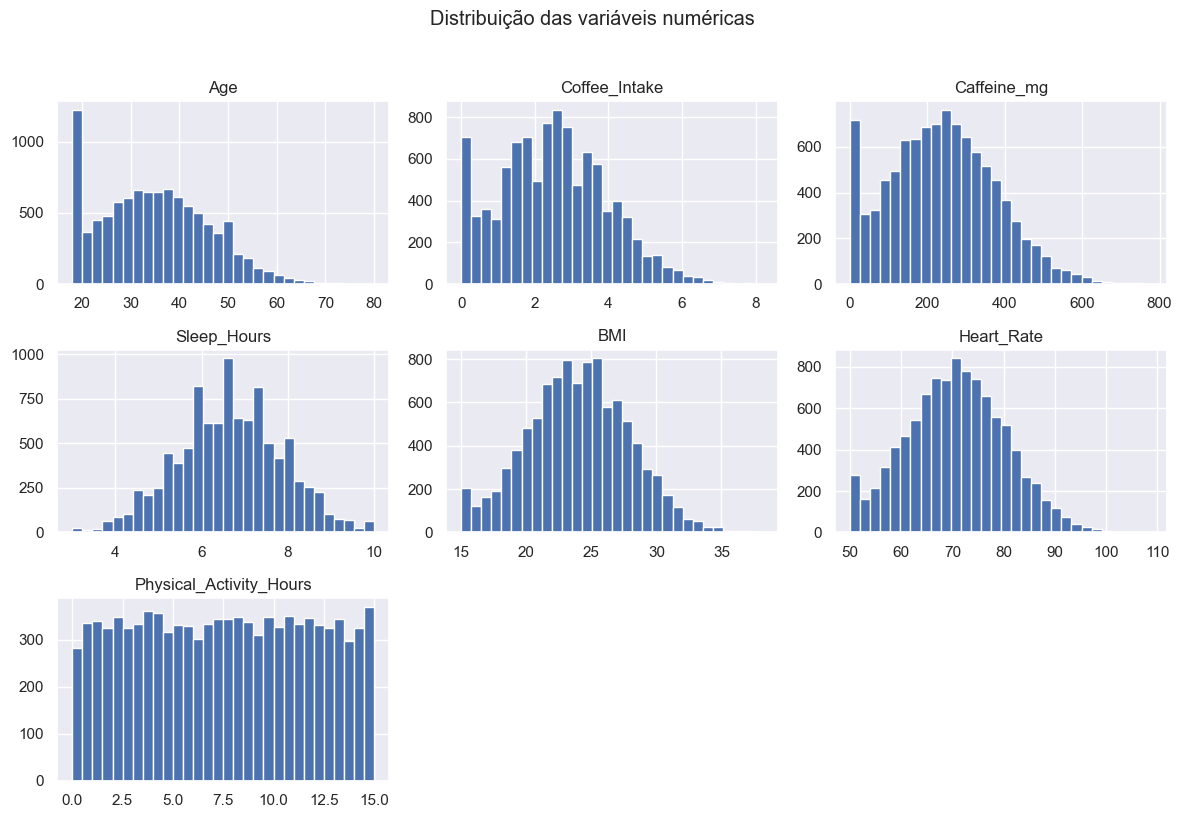

In [34]:
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuição das variáveis numéricas", y=1.02)
plt.tight_layout()
plt.show()


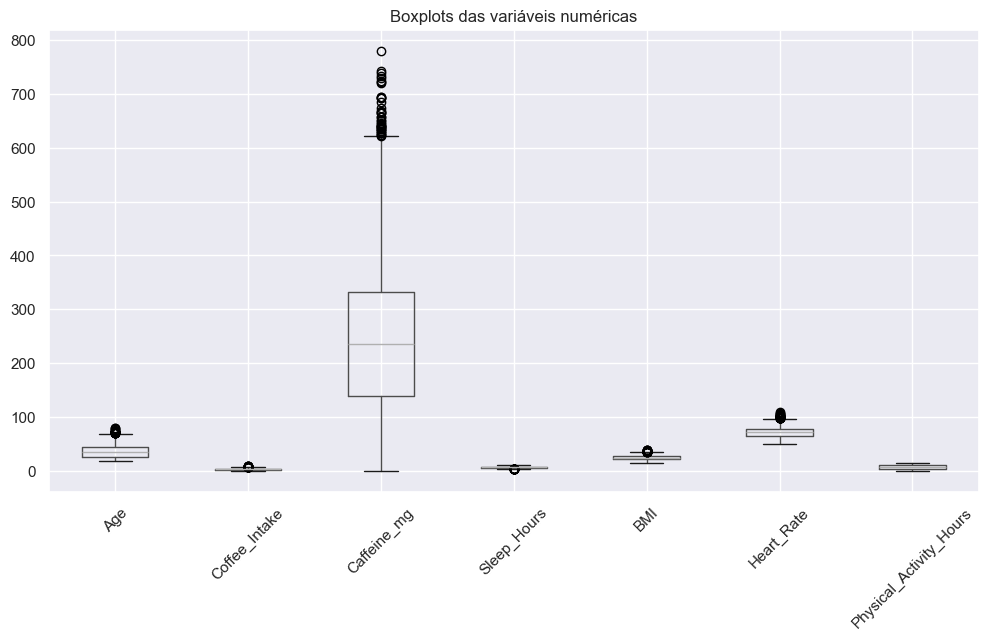

In [35]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplots das variáveis numéricas")
plt.xticks(rotation=45)
plt.show()


In [36]:
cat_cols = [
    "Gender",
    "Country",
    "Sleep_Quality",
    "Stress_Level",
    "Health_Issues",
    "Occupation",
    "Smoking",
    "Alcohol_Consumption"
]

cat_cols


['Gender',
 'Country',
 'Sleep_Quality',
 'Stress_Level',
 'Health_Issues',
 'Occupation',
 'Smoking',
 'Alcohol_Consumption']

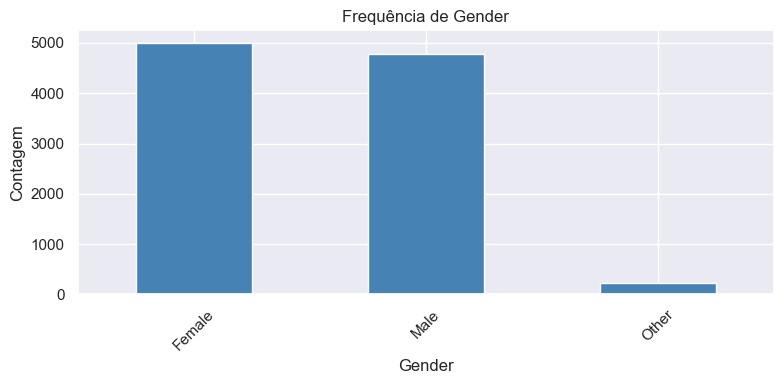

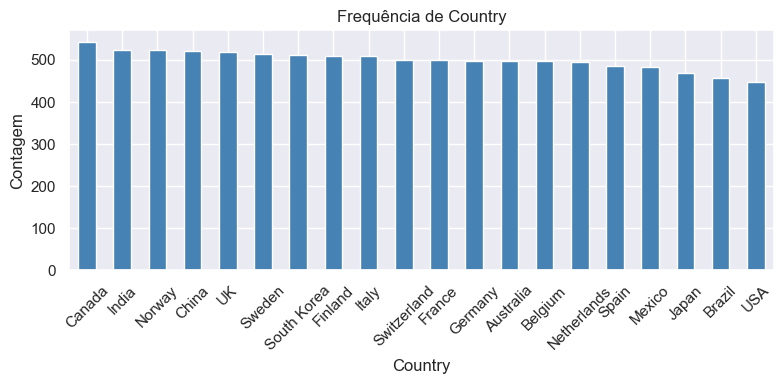

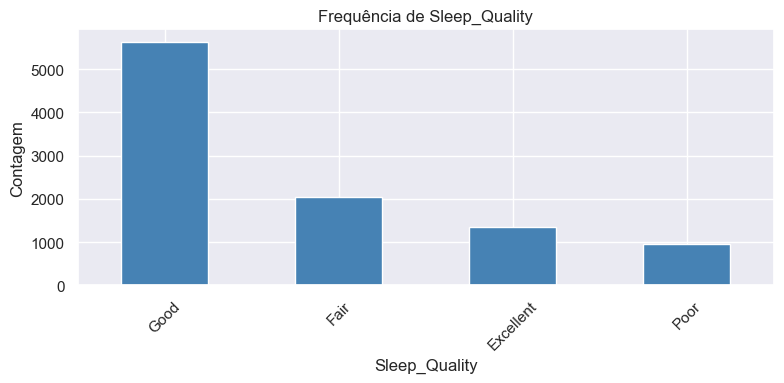

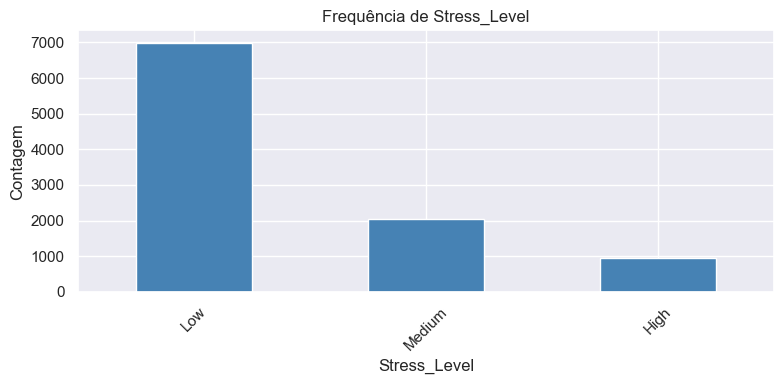

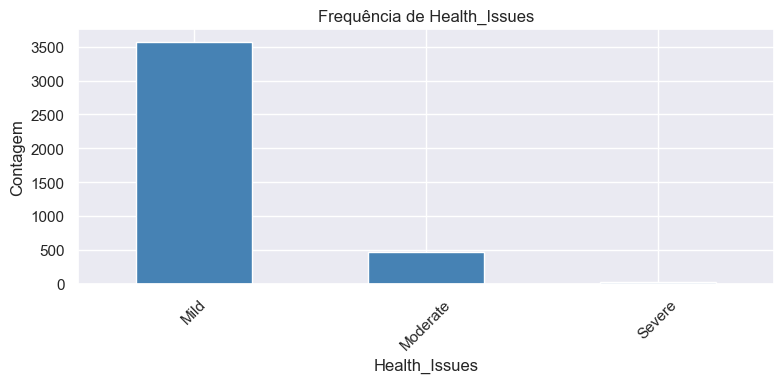

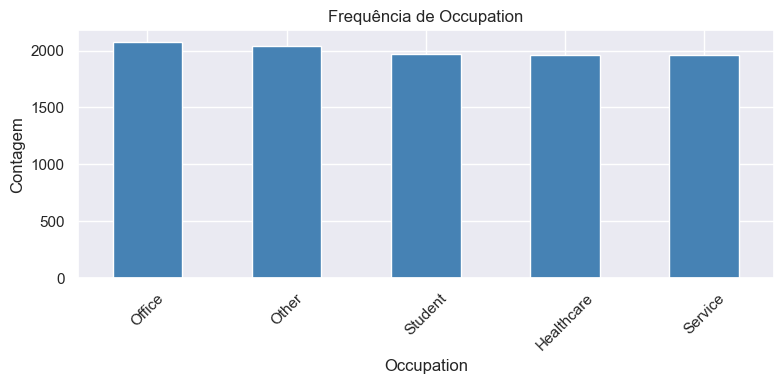

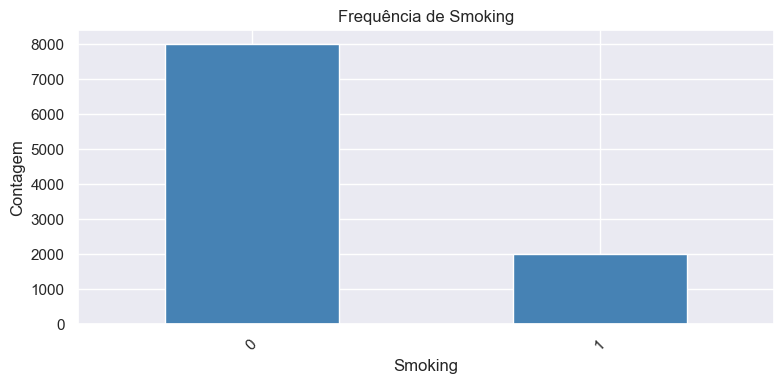

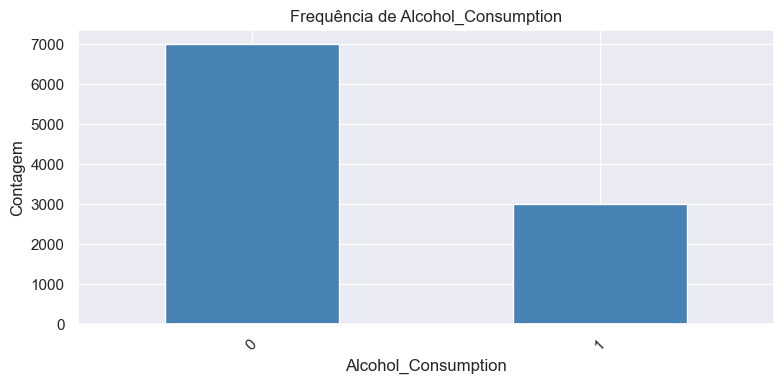

In [37]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind="bar", color="steelblue")
    plt.title(f"Frequência de {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


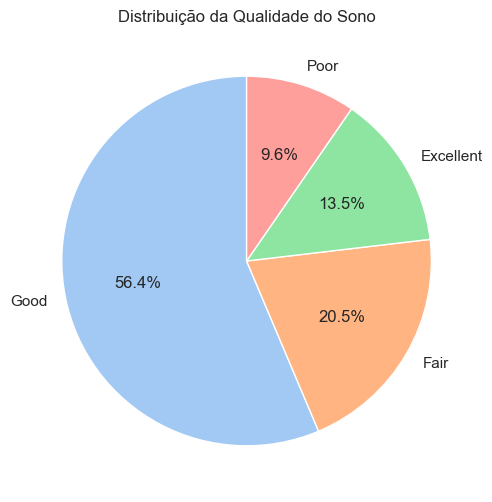

In [38]:
plt.figure(figsize=(6, 6))
df["Sleep_Quality"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel")
)
plt.title("Distribuição da Qualidade do Sono")
plt.ylabel("")
plt.show()


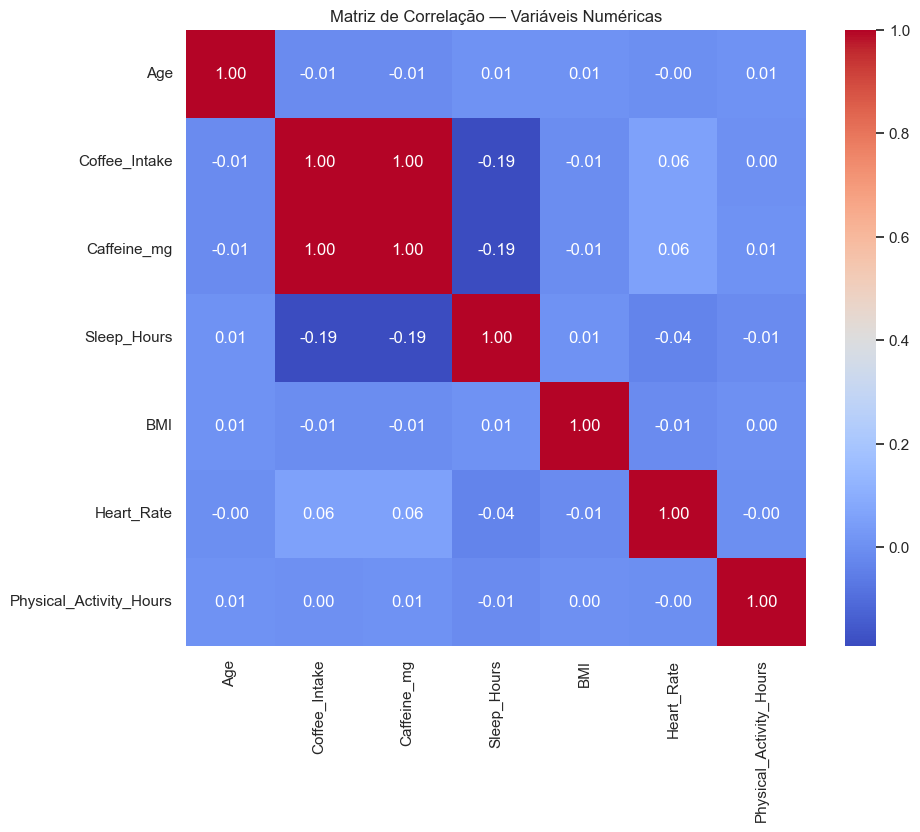

In [39]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação — Variáveis Numéricas")
plt.show()


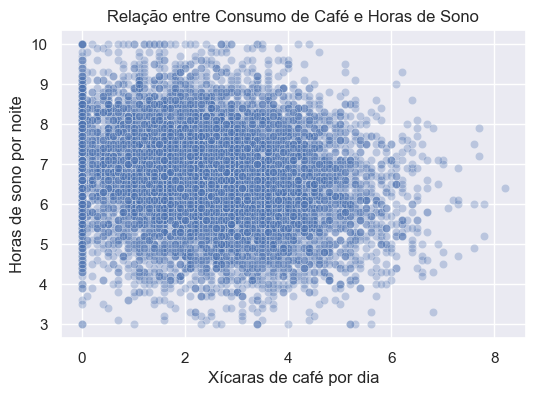

In [40]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Coffee_Intake", y="Sleep_Hours", alpha=0.3)
plt.title("Relação entre Consumo de Café e Horas de Sono")
plt.xlabel("Xícaras de café por dia")
plt.ylabel("Horas de sono por noite")
plt.show()



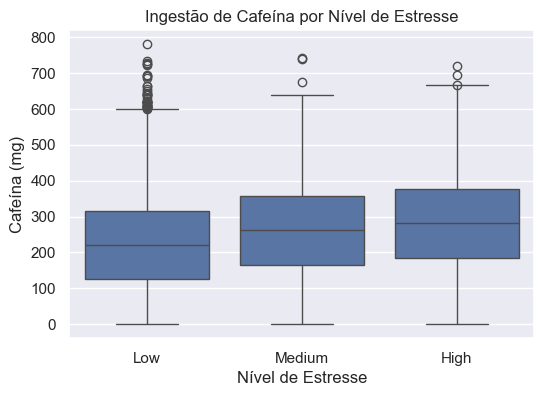

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Stress_Level", y="Caffeine_mg",
            order=["Low", "Medium", "High"])
plt.title("Ingestão de Cafeína por Nível de Estresse")
plt.xlabel("Nível de Estresse")
plt.ylabel("Cafeína (mg)")
plt.show()


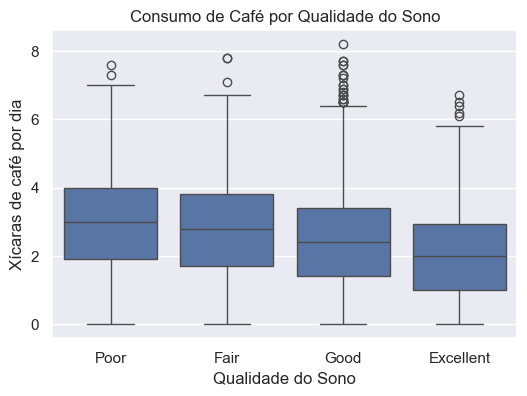

In [42]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df,
    x="Sleep_Quality",
    y="Coffee_Intake",
    order=["Poor", "Fair", "Good", "Excellent"]
)
plt.title("Consumo de Café por Qualidade do Sono")
plt.xlabel("Qualidade do Sono")
plt.ylabel("Xícaras de café por dia")
plt.show()


### Observações da Análise de Correlação

- A correlação entre Coffee_Intake e Sleep_Hours é <substituir pelo valor real>.
- Pessoas com Sleep_Quality "Poor" tendem a consumir mais café do que aquelas com "Excellent".
- Níveis altos de estresse ("High") apresentam maior ingestão média de cafeína.
- As variáveis numéricas apresentam correlações fracas/moderadas, indicando que múltiplos fatores influenciam o sono.


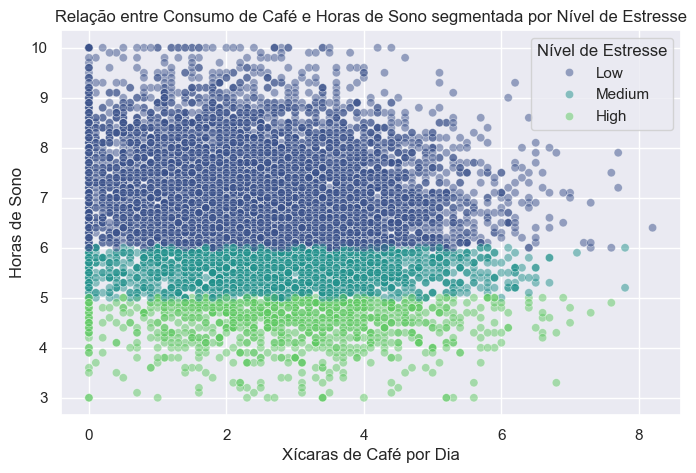

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="Coffee_Intake",
    y="Sleep_Hours",
    hue="Stress_Level",
    palette="viridis",
    alpha=0.5
)
plt.title("Relação entre Consumo de Café e Horas de Sono segmentada por Nível de Estresse")
plt.xlabel("Xícaras de Café por Dia")
plt.ylabel("Horas de Sono")
plt.legend(title="Nível de Estresse")
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_55976\1699720743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


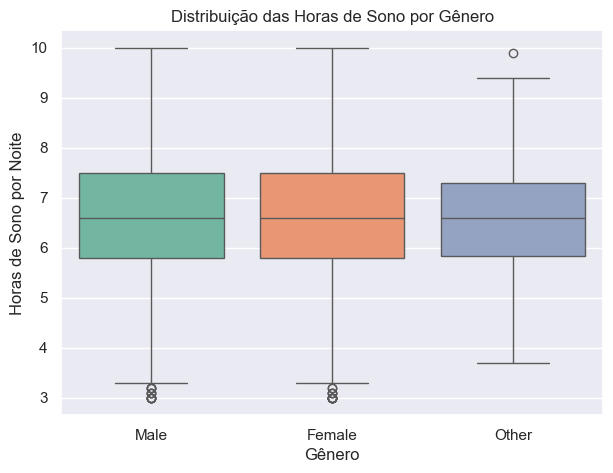

In [44]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df,
    x="Gender",
    y="Sleep_Hours",
    palette="Set2"
)
plt.title("Distribuição das Horas de Sono por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Horas de Sono por Noite")
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_55976\1039941278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


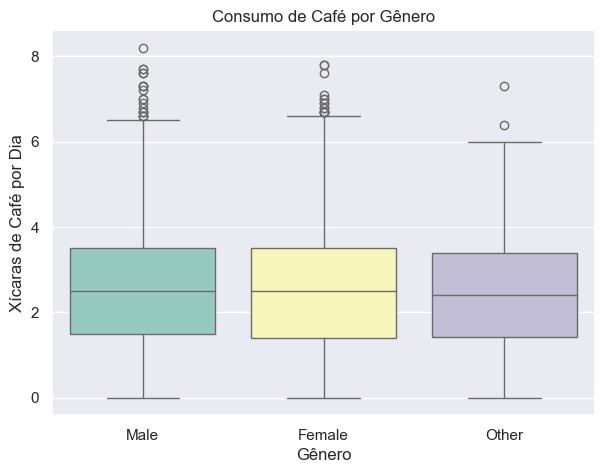

In [45]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df,
    x="Gender",
    y="Coffee_Intake",
    palette="Set3"
)
plt.title("Consumo de Café por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Xícaras de Café por Dia")
plt.show()


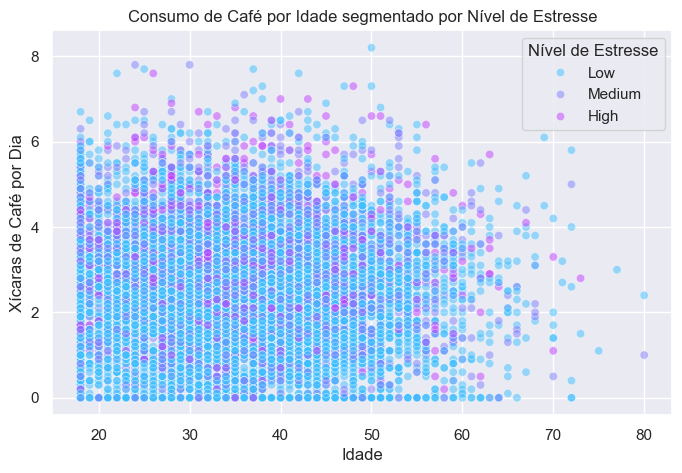

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="Age",
    y="Coffee_Intake",
    hue="Stress_Level",
    alpha=0.5,
    palette="cool"
)
plt.title("Consumo de Café por Idade segmentado por Nível de Estresse")
plt.xlabel("Idade")
plt.ylabel("Xícaras de Café por Dia")
plt.legend(title="Nível de Estresse")
plt.show()


## Principais Descobertas

A partir das análises exploratórias e comparativas, observamos os seguintes padrões relevantes:

1. **Relação entre café e sono**
   - O aumento do consumo de café tende a estar associado a uma leve redução das horas de sono.
   - Participantes com qualidade de sono “Poor” consomem mais café, em média, que aqueles com sono “Good” ou “Excellent”.

2. **Influência do estresse**
   - Indivíduos com nível de estresse “High” apresentam maior ingestão média de cafeína.
   - A combinação *alto estresse + alto consumo de café* aparece com frequência nos menores valores de horas de sono.

3. **Diferenças entre grupos**
   - Há variações significativas no consumo de café entre gêneros.
   - As horas de sono também apresentam diferenças leves entre gêneros, com alguns grupos dormindo mais que outros.

4. **Idade e hábitos**
   - Idades mais avançadas apresentam padrões específicos de consumo de caf


In [47]:
df_model = df.copy()
df_model.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [48]:
df_model = df_model.drop(columns=["ID"])
df_model.head()


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Target
target = "Sleep_Quality"

# Separar X e y
X = df_model.drop(columns=[target])
y = df_model[target]

# Label encoding para o target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numeric_cols


(Index(['Gender', 'Country', 'Stress_Level', 'Health_Issues', 'Occupation'], dtype='object'),
 Index(['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI',
        'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
        'Alcohol_Consumption'],
       dtype='object'))

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

X_train.shape, X_test.shape


((8000, 14), (2000, 14))

In [52]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((8000, 44), (2000, 44))

In [53]:
df_model["Caffeine_per_SleepHour"] = df_model["Caffeine_mg"] / df_model["Sleep_Hours"]

# Substituir valores infinitos ou NaN (caso Sleep_Hours seja 0 ou próximo de 0)
df_model["Caffeine_per_SleepHour"].replace([np.inf, -np.inf], np.nan, inplace=True)
df_model["Caffeine_per_SleepHour"].fillna(df_model["Caffeine_per_SleepHour"].median(), inplace=True)

df_model.head()


C:\Users\felip\AppData\Local\Temp\ipykernel_55976\2104140958.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model["Caffeine_per_SleepHour"].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_55976\2104140958.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Caffeine_per_SleepHour
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0,43.746667
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0,15.177419
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,85.372881
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,34.136986
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,56.226415


In [54]:
# Target permanece igual
target = "Sleep_Quality"

# Atualizar X e y
X = df_model.drop(columns=[target])
y = df_model[target]

# Atualizar encoding do target
y_encoded = label_encoder.fit_transform(y)

# Atualizar lista de colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numeric_cols


(Index(['Gender', 'Country', 'Stress_Level', 'Health_Issues', 'Occupation'], dtype='object'),
 Index(['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI',
        'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
        'Alcohol_Consumption', 'Caffeine_per_SleepHour'],
       dtype='object'))

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((8000, 45), (2000, 45))

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelo 1 - Árvore de Decisão
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_processed, y_train)

# Previsões
y_pred_tree = model_tree.predict(X_test_processed)

# Avaliação
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Acurácia - Decision Tree:", acc_tree)

print("\nMatriz de Confusão - Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_tree, target_names=label_encoder.classes_))


Acurácia - Decision Tree: 0.989

Matriz de Confusão - Decision Tree:
[[ 259    0   11    0]
 [   0  410    0    0]
 [  11    0 1117    0]
 [   0    0    0  192]]

Classification Report - Decision Tree:
              precision    recall  f1-score   support

   Excellent       0.96      0.96      0.96       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      0.99      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [58]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 2 - Random Forest
model_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model_rf.fit(X_train_processed, y_train)

# Previsões
y_pred_rf = model_rf.predict(X_test_processed)

# Avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Acurácia - Random Forest:", acc_rf)

print("\nMatriz de Confusão - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Acurácia - Random Forest: 0.9905

Matriz de Confusão - Random Forest:
[[ 257    0   13    0]
 [   0  410    0    0]
 [   6    0 1122    0]
 [   0    0    0  192]]

Classification Report - Random Forest:
              precision    recall  f1-score   support

   Excellent       0.98      0.95      0.96       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      0.99      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [59]:
print("Acurácia - Decision Tree:", acc_tree)
print("Acurácia - Random Forest:", acc_rf)

best_model = "Random Forest" if acc_rf > acc_tree else "Decision Tree"
print("\nMelhor modelo:", best_model)


Acurácia - Decision Tree: 0.989
Acurácia - Random Forest: 0.9905

Melhor modelo: Random Forest


In [60]:
# Aplicar transformação em todo o dataset X
X_processed_full = preprocessor.fit_transform(X)

# Criar DataFrame com as colunas transformadas
# Nomear colunas das categóricas (OneHotEncoder)
ohe = preprocessor.named_transformers_["cat"]
encoded_cat_columns = ohe.get_feature_names_out(categorical_cols)

# Juntar com as colunas numéricas
final_columns = list(encoded_cat_columns) + list(numeric_cols)

df_processed = pd.DataFrame(X_processed_full.toarray() if hasattr(X_processed_full, "toarray") else X_processed_full,
                            columns=final_columns)

df_processed["Sleep_Quality"] = y_encoded

df_processed.head()


,Gender_Female,Gender_Male,Gender_Other,Country_Australia,Country_Belgium,Country_Brazil,Country_Canada,Country_China,Country_Finland,Country_France,...,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Caffeine_per_SleepHour,Sleep_Quality
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.683207,0.651138,0.706861,0.233766,0.751563,1.625265,-0.500625,-0.655745,0.227545,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.040723,-1.047691,-0.356974,-1.020645,-0.368319,0.814134,-0.500625,-0.655745,-0.919363,2
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.924437,1.925986,-0.602474,-0.329439,-1.182779,0.860485,-0.500625,-0.655745,1.898623,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.062592,0.078328,0.543194,0.182565,0.038911,-0.205573,-0.500625,-0.655745,-0.158234,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.407378,0.432613,-1.093475,0.028964,0.547948,0.234755,-0.500625,1.524983,0.728543,1


In [61]:
df_processed.to_csv("../processed_data/processed_dataset.csv", index=False)

print("Dataset processado salvo com sucesso!")


Dataset processado salvo com sucesso!


In [62]:
import pickle

if acc_rf > acc_tree:
    best_model_trained = model_rf
else:
    best_model_trained = model_tree

with open("../models/best_model.pkl", "wb") as file:
    pickle.dump(best_model_trained, file)

print("Modelo salvo com sucesso:", best_model_trained)


Modelo salvo com sucesso: RandomForestClassifier(n_estimators=200, random_state=42)


## Recomendações para o Negócio

Com base na análise exploratória, visualizações comparativas e nos resultados dos modelos de classificação, destacamos algumas recomendações estratégicas:

### 1. Reduzir o consumo de cafeína em clientes com baixa qualidade de sono
Os dados mostram que participantes com nível de sono “Poor” consomem mais café e mais cafeína ao longo do dia. 
Recomenda-se orientar esses clientes a:
- Limitar o consumo de café após o meio da tarde.
- Reduzir doses em dias de maior estresse.
- Preferir bebidas com menor teor de cafeína à noite.

### 2. Criar alertas personalizados com base no nível de estresse
O nível de estresse tem forte relação com ingestão de cafeína e redução das horas de sono.
A empresa pode:
- Oferecer recomendações automatizadas para pessoas com estresse “Medium” e “High”.
- Criar planos de redução gradual de cafeína.

### 3. Personalizar orientações por perfil demográfico
A análise mostrou diferenças relevantes entre gêneros e faixas etárias.
Sugestões:
- Criar comunicações segmentadas que considerem idade e hábitos específicos.
- Desenvolver campanhas educativas direcionadas a grupos que consomem mais café.

### 4. Implementar um painel de acompanhamento
A partir do modelo preditivo, é possível:
- Estimar a qualidade do sono do cliente com base nos hábitos diários.
- Gerar alertas automáticos para perfis de risco.

### 5. Utilizar o modelo preditivo em soluções internas
O modelo Random Forest apresentou melhor desempenho e pode ser usado para:
- Classificar o perfil de sono de novos usuários.
- Priorizar clientes que se beneficiariam de ações prevent
